# Youtube Video Views Prediction

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
# pd.set_option('display.max_colwidth', None) #This one is used only to see the text features
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
# pip install openpyxl

In [3]:
df = pd.read_excel('youtube_statistics.xlsx')

#### Load Dataset (Google Colab)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# df = pd.read_excel('/content/drive/MyDrive/Google Drive/youtube_statistics.xlsx')

# Initial Data Understanding and Pre-Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Features Description :

- **trending_date:** Date when the video is trending.
- **title:** Video title.
- **channel_title:** Channel name.
- **category_id:** Video category in label encoding.
- **publish_time:** Video publishing time.
- **tags:** Tags used in the video.
- **views:** Number of video views.
- **likes:** Number of video likes.
- **dislikes:** Number of video dislikes.
- **comment_count:** Number of comments on the video.
- **comments_disabled:** Indicates whether comments are disabled for the video.
- **ratings_disabled:** Indicates whether ratings are disabled for the video.
- **video_error_or_removed:** Indicates whether the video is currently in error or has been removed.
- **description:** Video description.
- **No_tags:** Number of tags used.
- **desc_len:** Length of the video description in terms of words.
- **len_title:** Length of the video title in terms of words.
- **publish_date:** Date when the video was published.

In [7]:
df.sample(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
3091,2017-11-30,Lagira Zhala Jee - लगिरा झला जी - Episode 186 ...,zeemarathi,24,00:59:52,"Zee marathi|""Lagira Zhala Jee""|""full episode""|...",34918,102,4,6,False,False,False,http://www.ozee.com/shows/lagira-zhala-jee - C...,10,766,76,2017-11-29
26295,2018-04-17,TVF's Monitor Ho Toh Aisa | Classroom Qtiyapa,The Viral Fever,24,13:02:47,"the viral fever|""tvf""|""humour""|""qtiyapa""|""come...",1895120,68224,6660,4384,False,False,False,"Monitor, Prefect, Teacher ka Chamcha etc. call...",35,2045,45,2018-04-13
30225,2018-05-09,"Sembarathi - Episode 145 - May 07, 2018 - Best...",Zee Tamil,24,00:42:04,"zee Tamil|""Sembarathi""|""full episode""|""Tamil""|...",463514,1105,211,90,False,False,False,"To watch FULL episode of Sembarathi, CLICK her...",10,1067,52,2018-05-08
16057,2018-02-11,BYN : One By Two,Be YouNick,23,09:43:52,"game|""five nights at freddys""|""be""|""you""|""nick...",1261821,61578,2512,2121,False,False,False,Follow The Team :\nNick - https://www.instagra...,17,732,16,2018-02-06
1190,2017-11-20,Vamsam - வம்சம் | Climax Episode | Tamil Seria...,VisionTimeTamil,24,15:56:49,"Sun TV Tamil serials|""Vamsam (TV Program)""|""Va...",317620,2215,322,426,False,False,False,Lets watch the interesting Episode of Vamsam T...,22,394,84,2017-11-18
4019,2017-12-05,మీరుకుడా వాల్పేపర్గా దేవుడి ఫోటోస్ పెట్టుకుంటు...,Mana Telugu,22,12:30:00,మీరుకుడా వాల్పేపర్గా దేవుడి ఫోటోస్ పెట్టుకుంటు...,96641,565,116,0,True,False,False,For More Updates :\nhttp://manatelugumedia.com...,33,73,99,2017-12-02
159,2017-11-14,8 Bollywood Actresses who become early age mom...,TOP 10 STAR,27,04:34:11,"TOP10STAR|""TOp 10 STAR""|""8 Bollywood Actresses...",103975,162,54,12,False,False,False,8 Bollywood Actresses who become early age mom...,22,2234,66,2017-11-12
3077,2017-11-30,Patas | 28th November 2017 | Full Episode 621...,ETV Plus India,23,17:19:45,"etv Plus|""etv comedy show""|""3 Idiots""|""anchor ...",198009,1032,107,224,False,False,False,It is a stand-up comedy show hosted and anchor...,33,519,57,2017-11-28
19345,2018-03-03,Kundali Bhagya - कुंडली भाग्य - Episode 57 - ...,zeetv,24,21:08:42,"zee tv|""Kundali Bhagya""|""full episode""|""hindi""...",623720,1749,152,134,False,False,False,"To watch FULL episode of Kundali Bhagya, CLICK...",10,1155,70,2018-03-01
27479,2018-04-24,Litti Chokha Recipe | लिट्टी चोखा की आसान रेसी...,Nisha Madhulika,26,05:26:06,"Sattu Bihari Recipe Without Oven|""बिहारी स्पेश...",239705,4937,287,1436,False,False,False,"Litti Chokha without Oven, Authentic Litti cho...",11,2421,97,2018-04-23


Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :

- trending_date feature have the wrong format should be in datetime instead of object, the publish_date already got the correct dtype. Regarding the publish_time, I personally think it would be useful to have more information, such as the number of views tracked over time, so that we can observe the movement of views at each point in time (time-series analysis). Currently, we can only see the start point (publish_date) and end point (trending_date)
- Video category (category_id) is displayed as a labelled number already, so we are quite unsure what the details of each video like which one is Gaming, Music Videos, News and Politics, etc
- title, tags, and description are quite interesting to play around in text mining though it will be quite challenging in separating the english and indian texts
- As for boolean feature like comments_disabled, ratings_disabled, video_error_or_removed potentially could be encoded by one-hot enxoding since they are nominal values
- channel_title most likely if we want to use it, will be done through frequency/count encoding
- Feature views is the target variable, we could move it to the last order in dataframe (personal preference)

In [8]:
# Re-arrange the columns (views in last)
df_1 = df.drop(columns='views')
df_2 = df['views']
df = pd.concat([df_1, df_2], axis='columns')

In [11]:
#Checking missing values
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
views                      0
dtype: int64

In [12]:
#Drop missing values
df = df.drop_duplicates()

In [13]:
#Checking amount of duplicated values
df.duplicated().sum()

0

# Descriptive Statistics

In [31]:
#Grouping columns based on their types
nums = ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'category_id', 'views']
cats = ['title', 'channel_title', 'tags','description']
date = ['trending_date', 'publish_date','publish_time']
bool = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

print("Numeric Columns:")
print(list(nums))

print("\nCategorical Columns:")
print(list(cats))

print("\nDate/Time Columns:")
print(list(date))

print("\nBoolean Columns:")
print(list(bool))

Numeric Columns:
['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'category_id', 'views']

Categorical Columns:
['title', 'channel_title', 'tags', 'description']

Date/Time Columns:
['trending_date', 'publish_date', 'publish_time']

Boolean Columns:
['comments_disabled', 'ratings_disabled', 'video_error_or_removed']


In [32]:
#Describe numerical columns
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
likes,32562.0,2.595444e+04,9.720113e+04,0.0,800.00,2817.0,12299.0,2912710.0
dislikes,32562.0,1.596781e+03,1.703103e+04,0.0,99.00,293.0,943.0,1545017.0
comment_count,32562.0,2.561673e+03,1.488591e+04,0.0,74.00,306.0,1188.0,827755.0
No_tags,32562.0,1.884906e+01,9.863164e+00,1.0,12.00,19.0,25.0,72.0
desc_len,32562.0,9.132707e+02,8.070886e+02,3.0,366.00,673.0,1226.0,5136.0
len_title,32562.0,7.099567e+01,2.228042e+01,5.0,54.00,75.0,91.0,100.0
category_id,32562.0,2.160242e+01,6.525405e+00,1.0,23.00,24.0,24.0,43.0
views,32562.0,1.007091e+06,3.171556e+06,4024.0,114162.25,277788.0,738924.5,125432237.0


In [33]:
#Describe categorical columns
df[cats].describe().transpose()

,count,unique,top,freq
title,32562,16431,Nandhini | Today @ 9 pm | Sun TV,15
channel_title,32562,1390,VikatanTV,208
tags,32562,12463,[none],1027
description,32518,13979,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,150


In [34]:
#Describe boolean columns
df[bool].describe().transpose()

,count,unique,top,freq
comments_disabled,32562,2,False,31478
ratings_disabled,32562,2,False,31873
video_error_or_removed,32562,2,False,32553


In [36]:
#Describe date columns
df[date].describe().transpose()

,count,mean,min,25%,50%,75%,max
publish_date,32562,2018-02-16 23:35:27.363183872,2017-05-27 00:00:00,2017-12-25 00:00:00,2018-02-12 00:00:00,2018-04-12 00:00:00,2018-06-13 00:00:00


# Univariate Analysis

## Numerical Columns

In [37]:
#Check number of subplots that will be make
len(df[nums].columns)

8

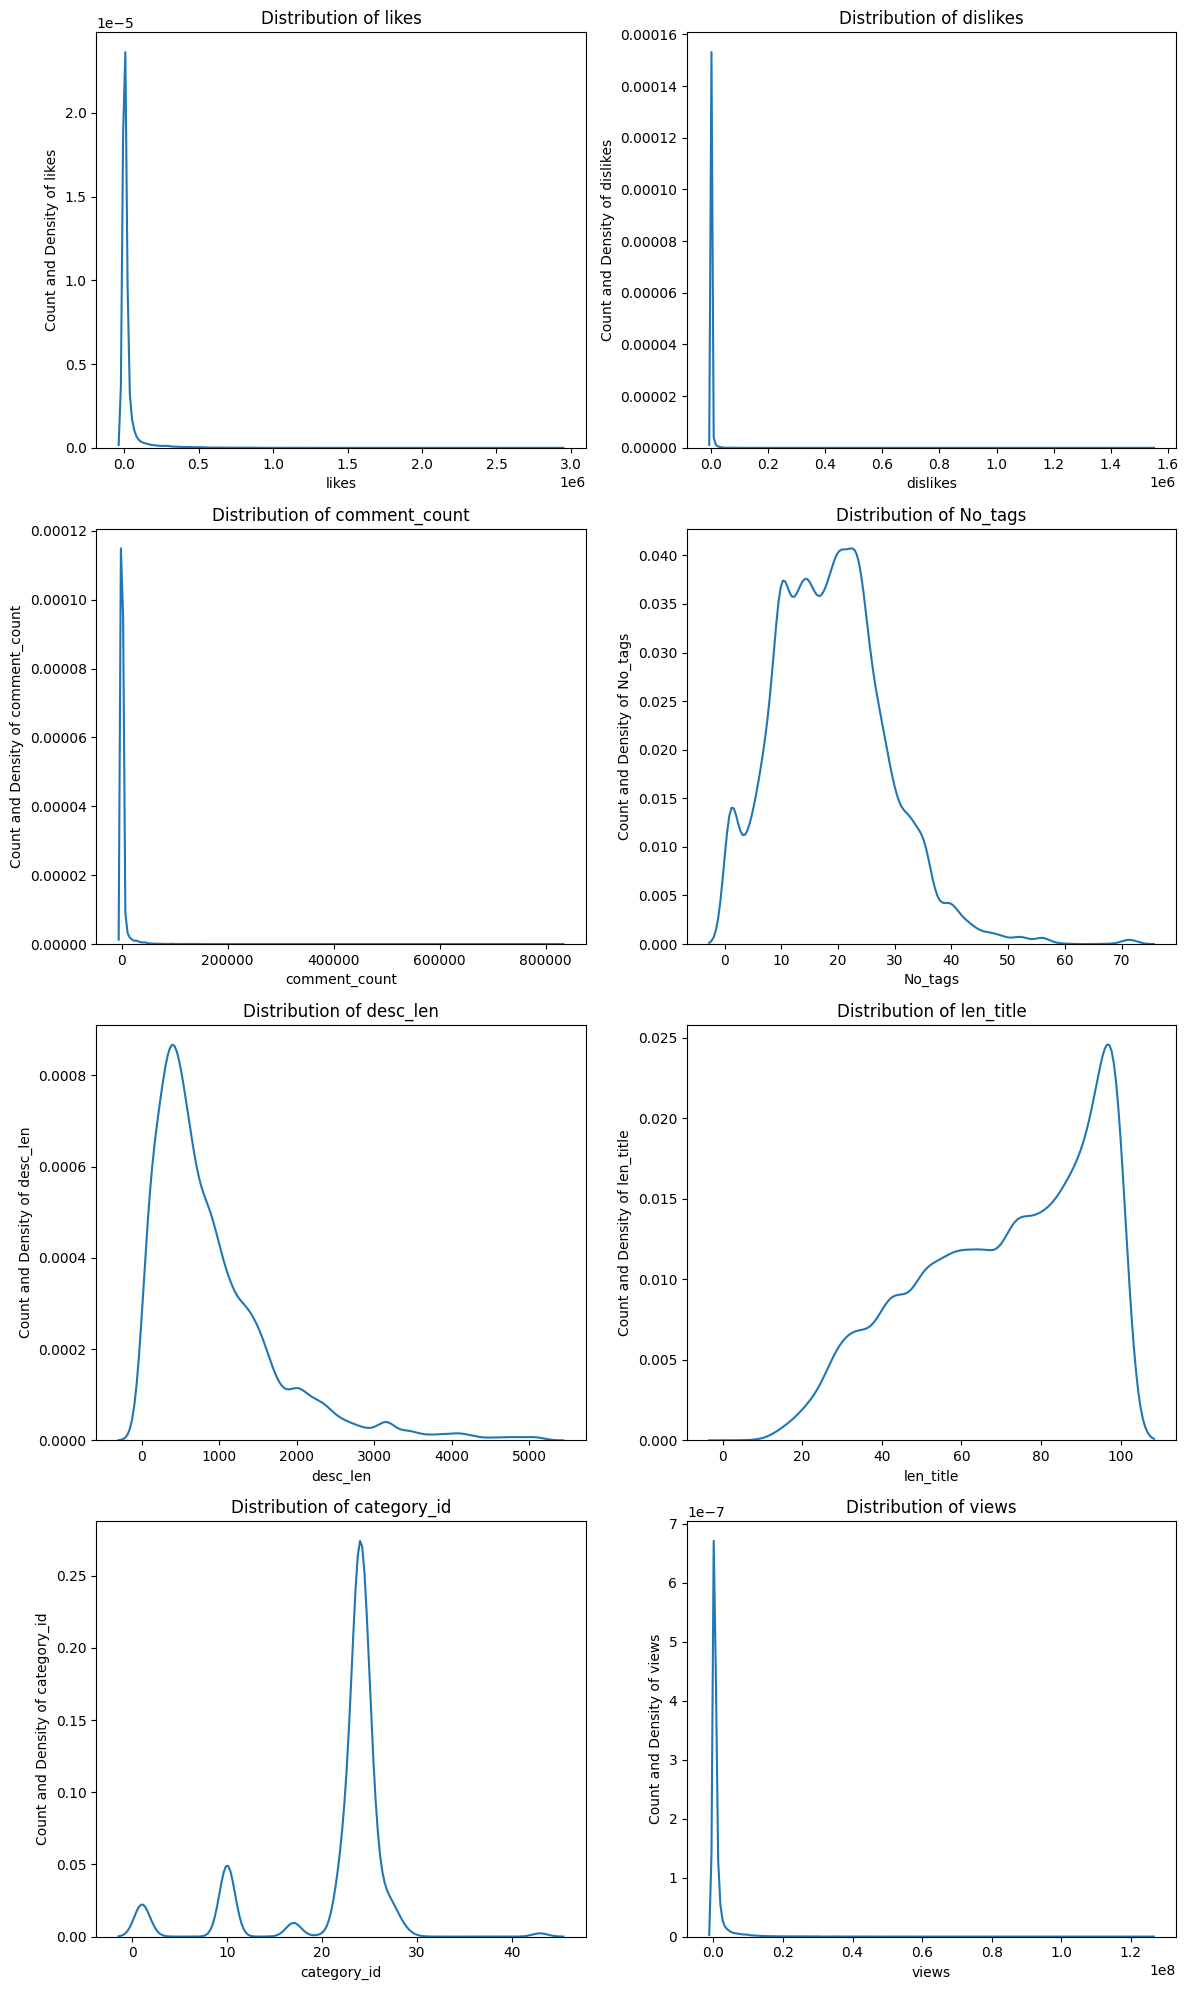

In [40]:
# Kdeplot

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.kdeplot(ax=axes[i], x=df[nums[i]])
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

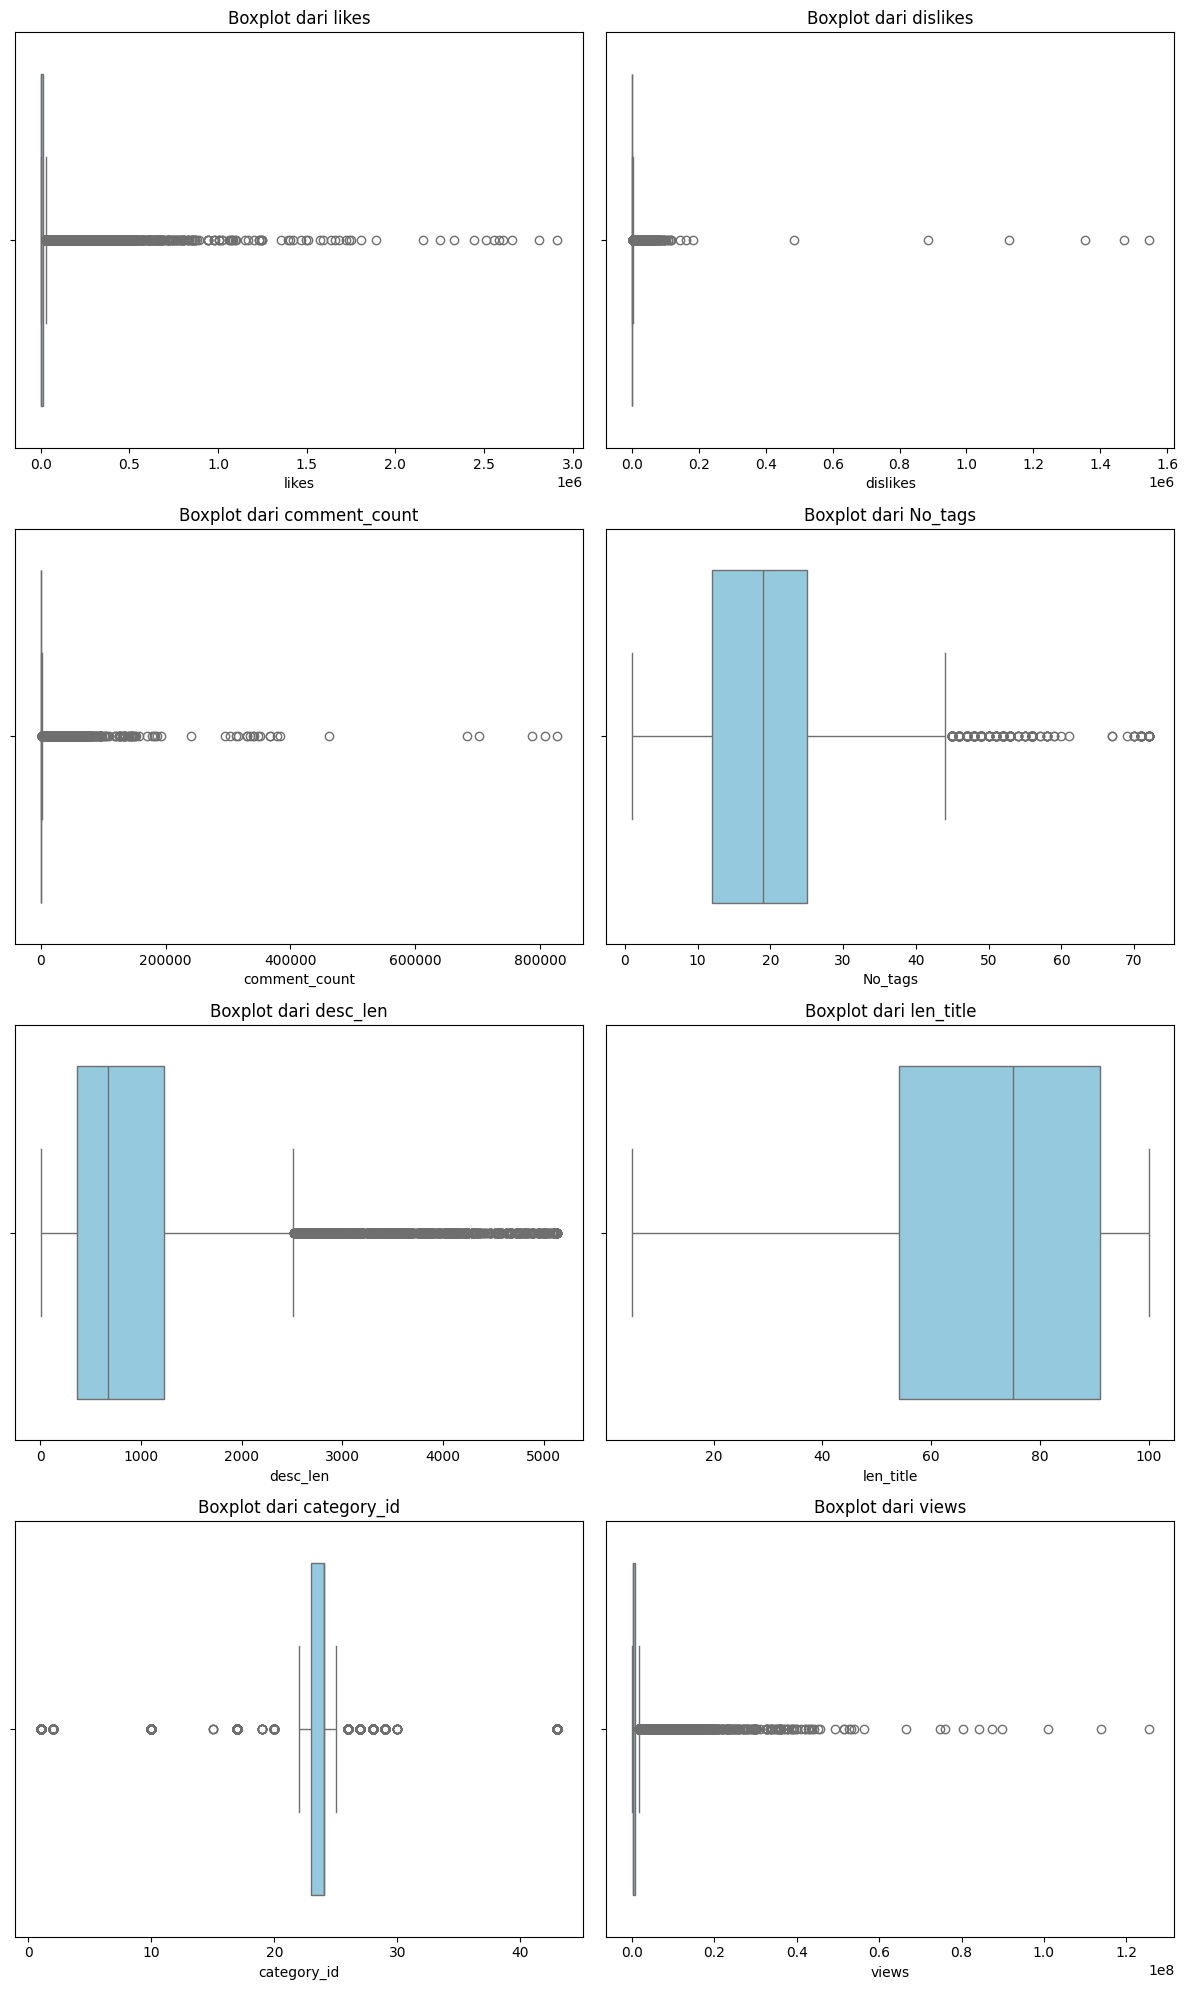

In [41]:
# Boxplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot dari {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

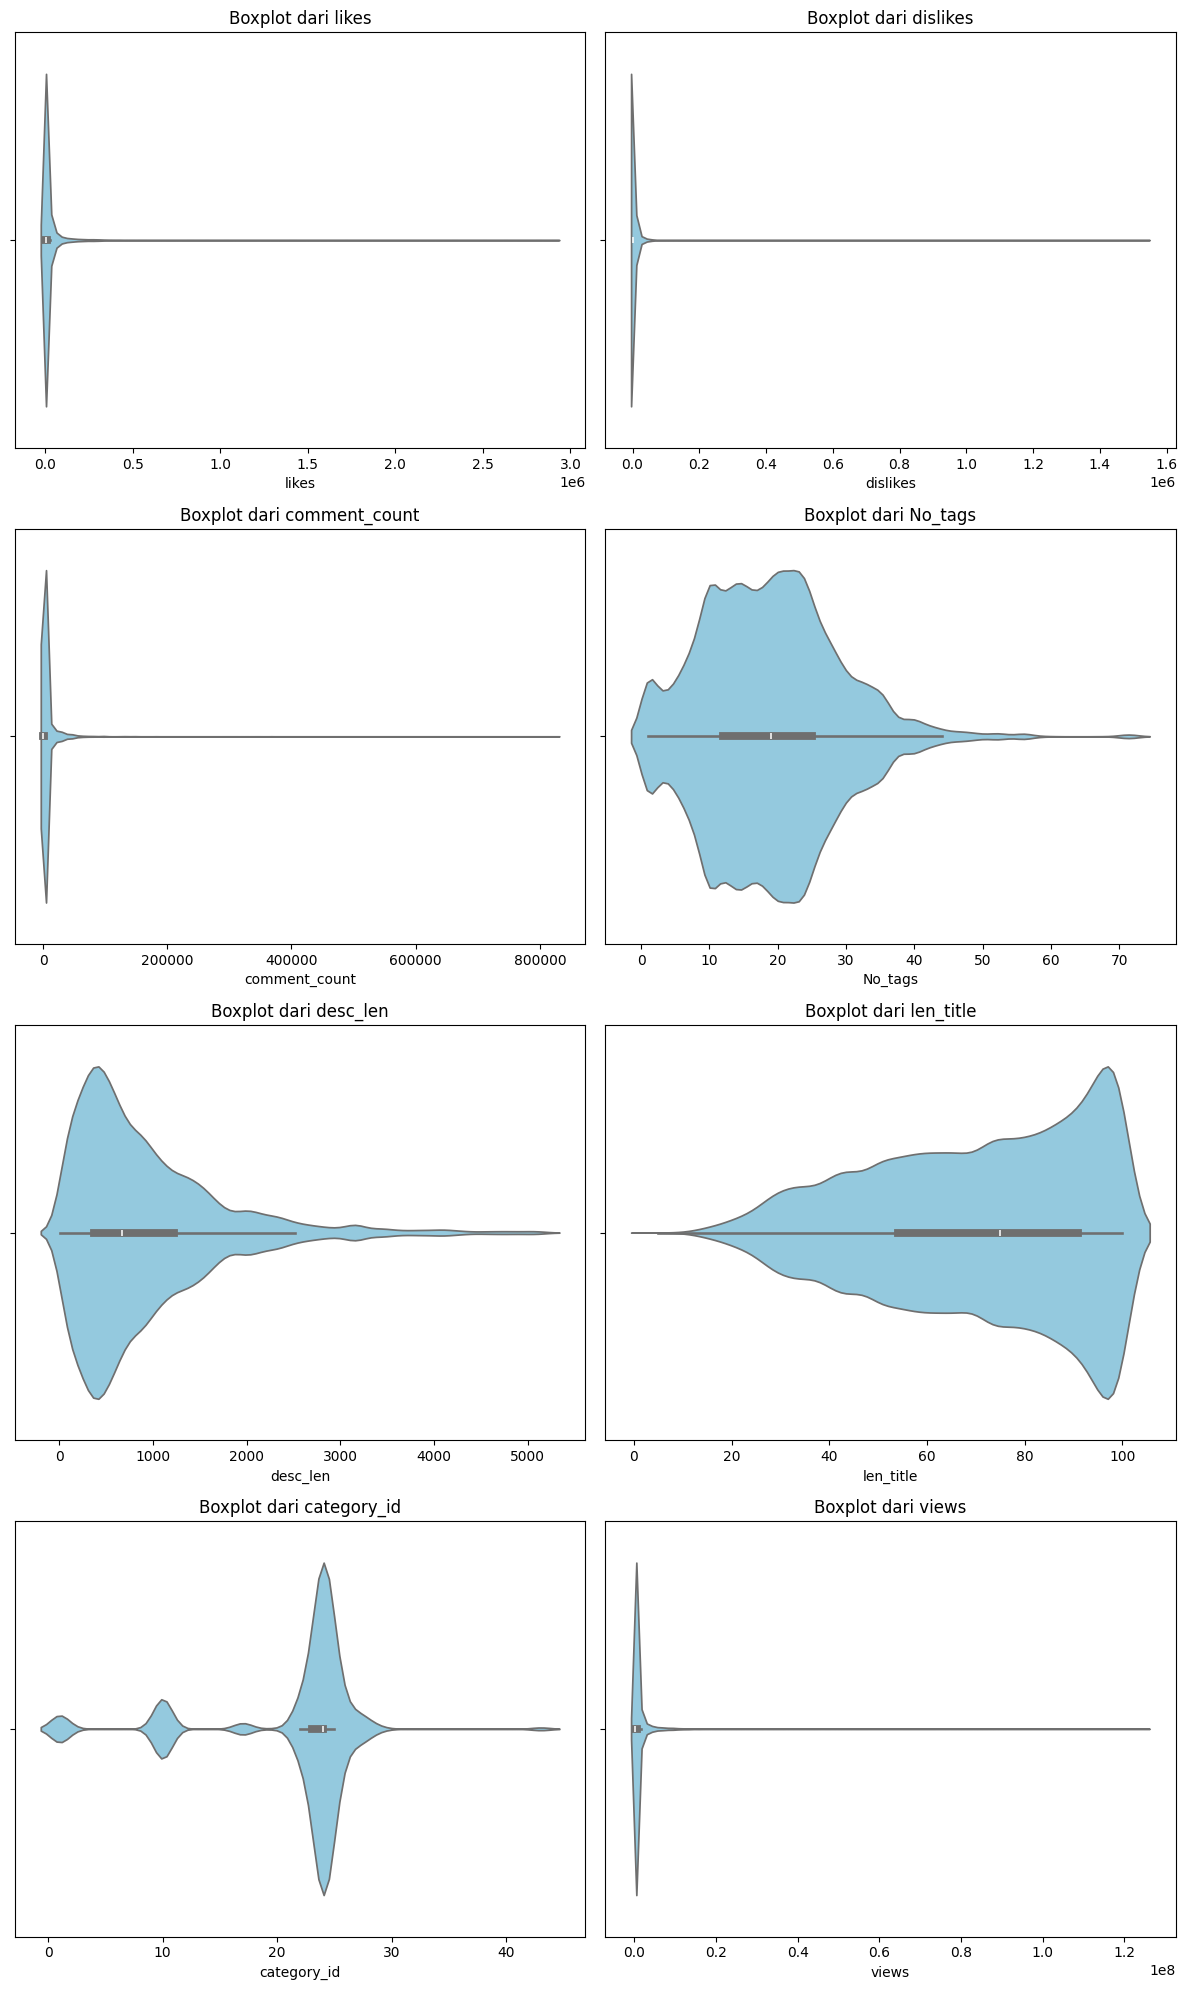

In [42]:
# Violinplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot dari {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

## Categorical and Boolean Columns

In [43]:
df[cats]

,title,channel_title,tags,description
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,"sharry mann|""sharry mann new song""|""sharry man...",Presenting Sharry Mann latest Punjabi Song Cu...
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...","पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,Eruma Saani | Tamil vs English,Eruma Saani,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",This video showcases the difference between pe...
4,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,"Filmylooks|""latest news""|""telugu movies""|""telu...",why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...
36739,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,"funny videos|""hotels""|""comedy""|""comedy video""|...",Maggu is preparing for Sharda University inter...
36740,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,"wwe|""world wrestling entertainment""|""wrestling...",The Miz serves as special guest referee in thi...
36741,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,"Dharma|""Dharma Productions""|""Dhadak""|""Janhvi K...","When two worlds collide, they become oneDhadak..."
36758,What If PubG Was Made In India ?,Angry Prash,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",This funny video is about what if players unkn...


In [24]:
#Categorical Feature Counts
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom title:
Nandhini | Today @ 9 pm | Sun TV                                                                        15
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                            14
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                               13
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                       12
School Ke Wo Din - Amit Bhadana                                                                         11
                                                                                                        ..
ജീവനെടുത്ത ഓട്ടോ ഡ്രൈവറുടെ ആത്മഹത്യ കുറിപ്പ് പുറത്ത്|new|asianet|news|malayalam|today|latest|exclusi     1
Budget 2018: देखिए क्या हुआ सस्ता और क्या महंगा | Headlines India                                        1
Fire in Madurai Meenakshi Amman Temple Complex, Many Shops Gutted | Thanthi TV                           1
Hey Jude Mal

Those features have too many unique values for direct plotting or one-hot encoding. Specific grouping through feature engineering and extraction is needed beforehand if you intend to use them

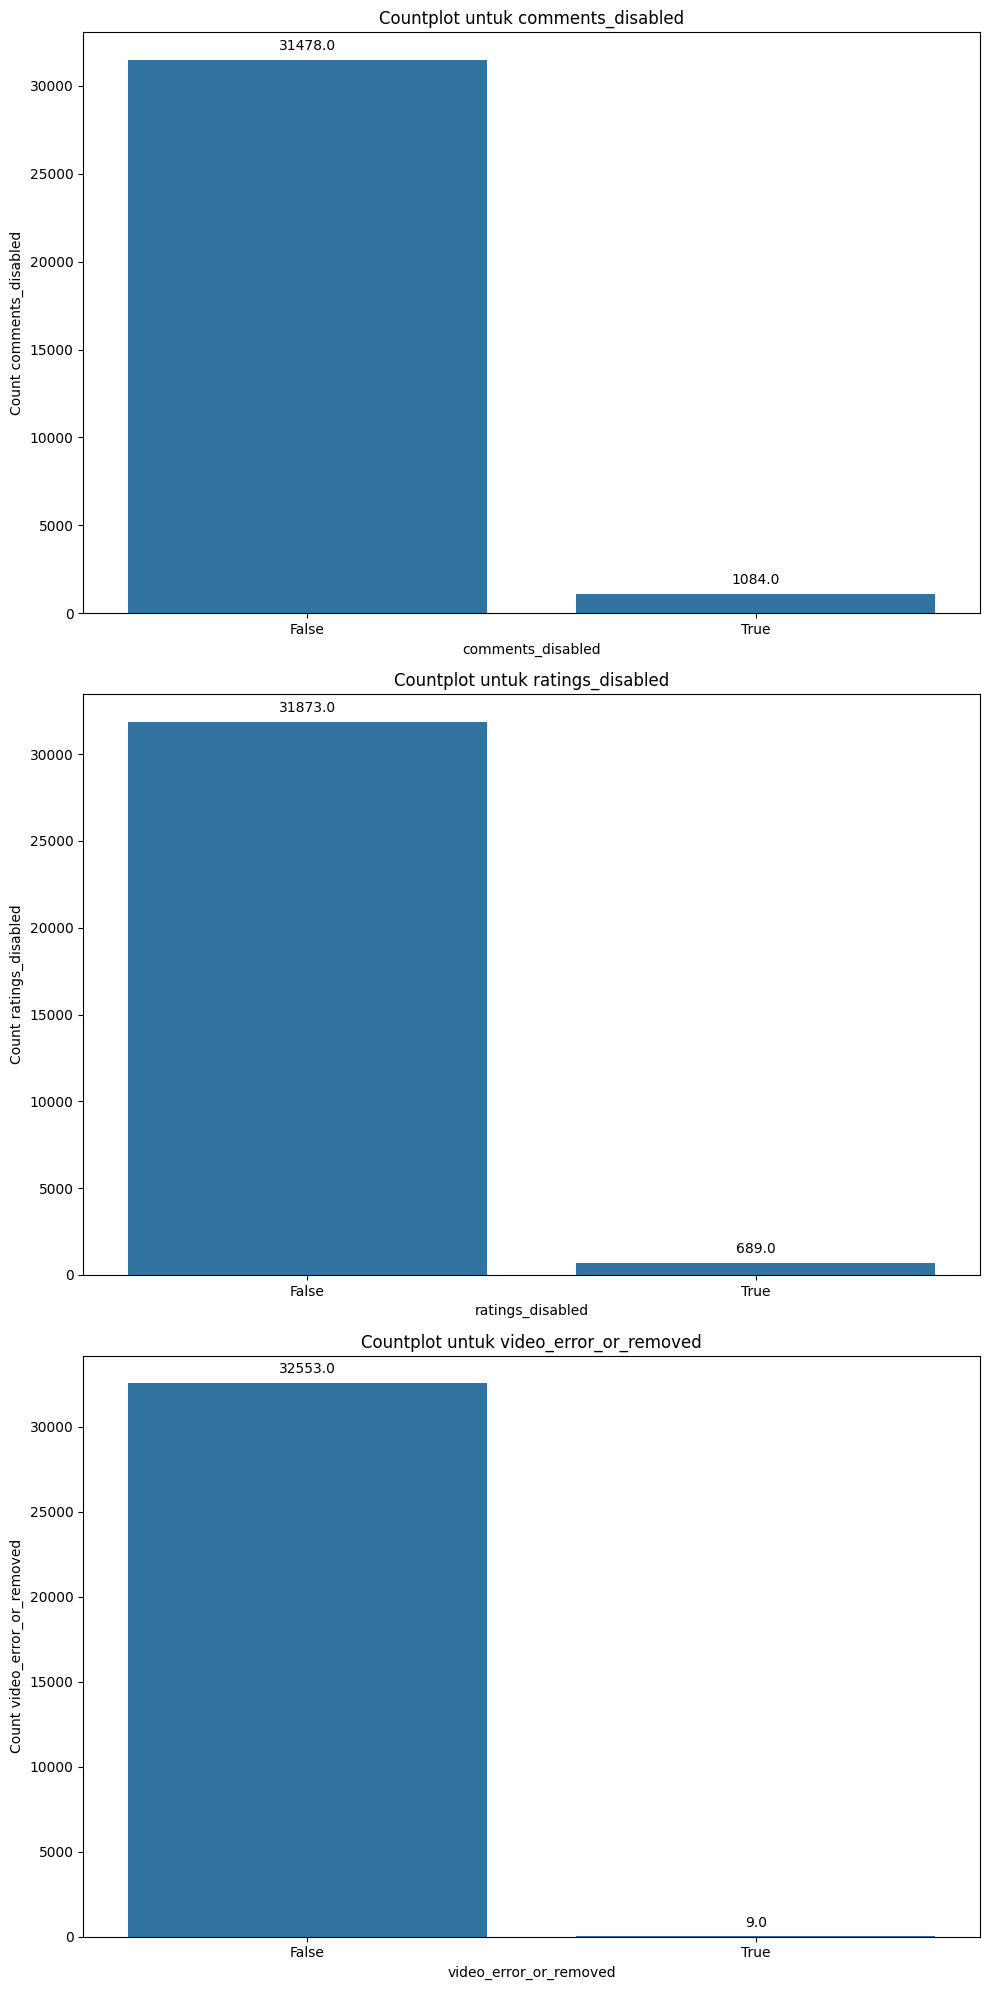

In [25]:
#Boolean features understanding
bool = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(bool)):
    ax = sns.countplot(ax=axes[i], x=df[bool[i]])
    axes[i].set_title(f'Countplot untuk {bool[i]}')
    axes[i].set_ylabel(f'Count {bool[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is a significant imbalance in these boolean values, so it will be addressed further, possibly through feature scaling, later on.

## Bivariate & Multivariate Analysis

In [26]:
df[nums].columns

Index(['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len',
       'len_title', 'category_id'],
      dtype='object')

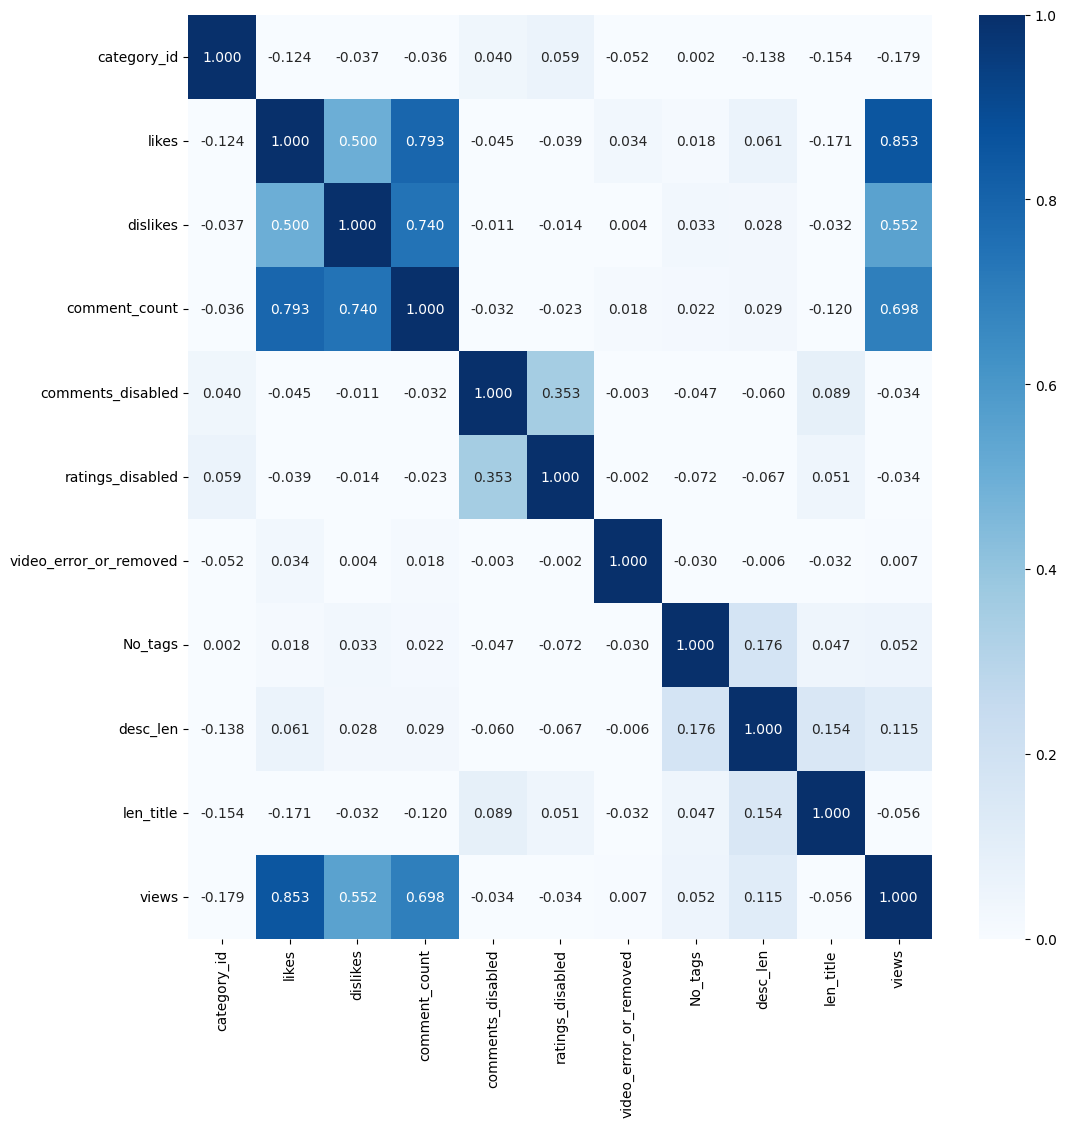

In [27]:
# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f', vmin=0, vmax=1)
plt.show()

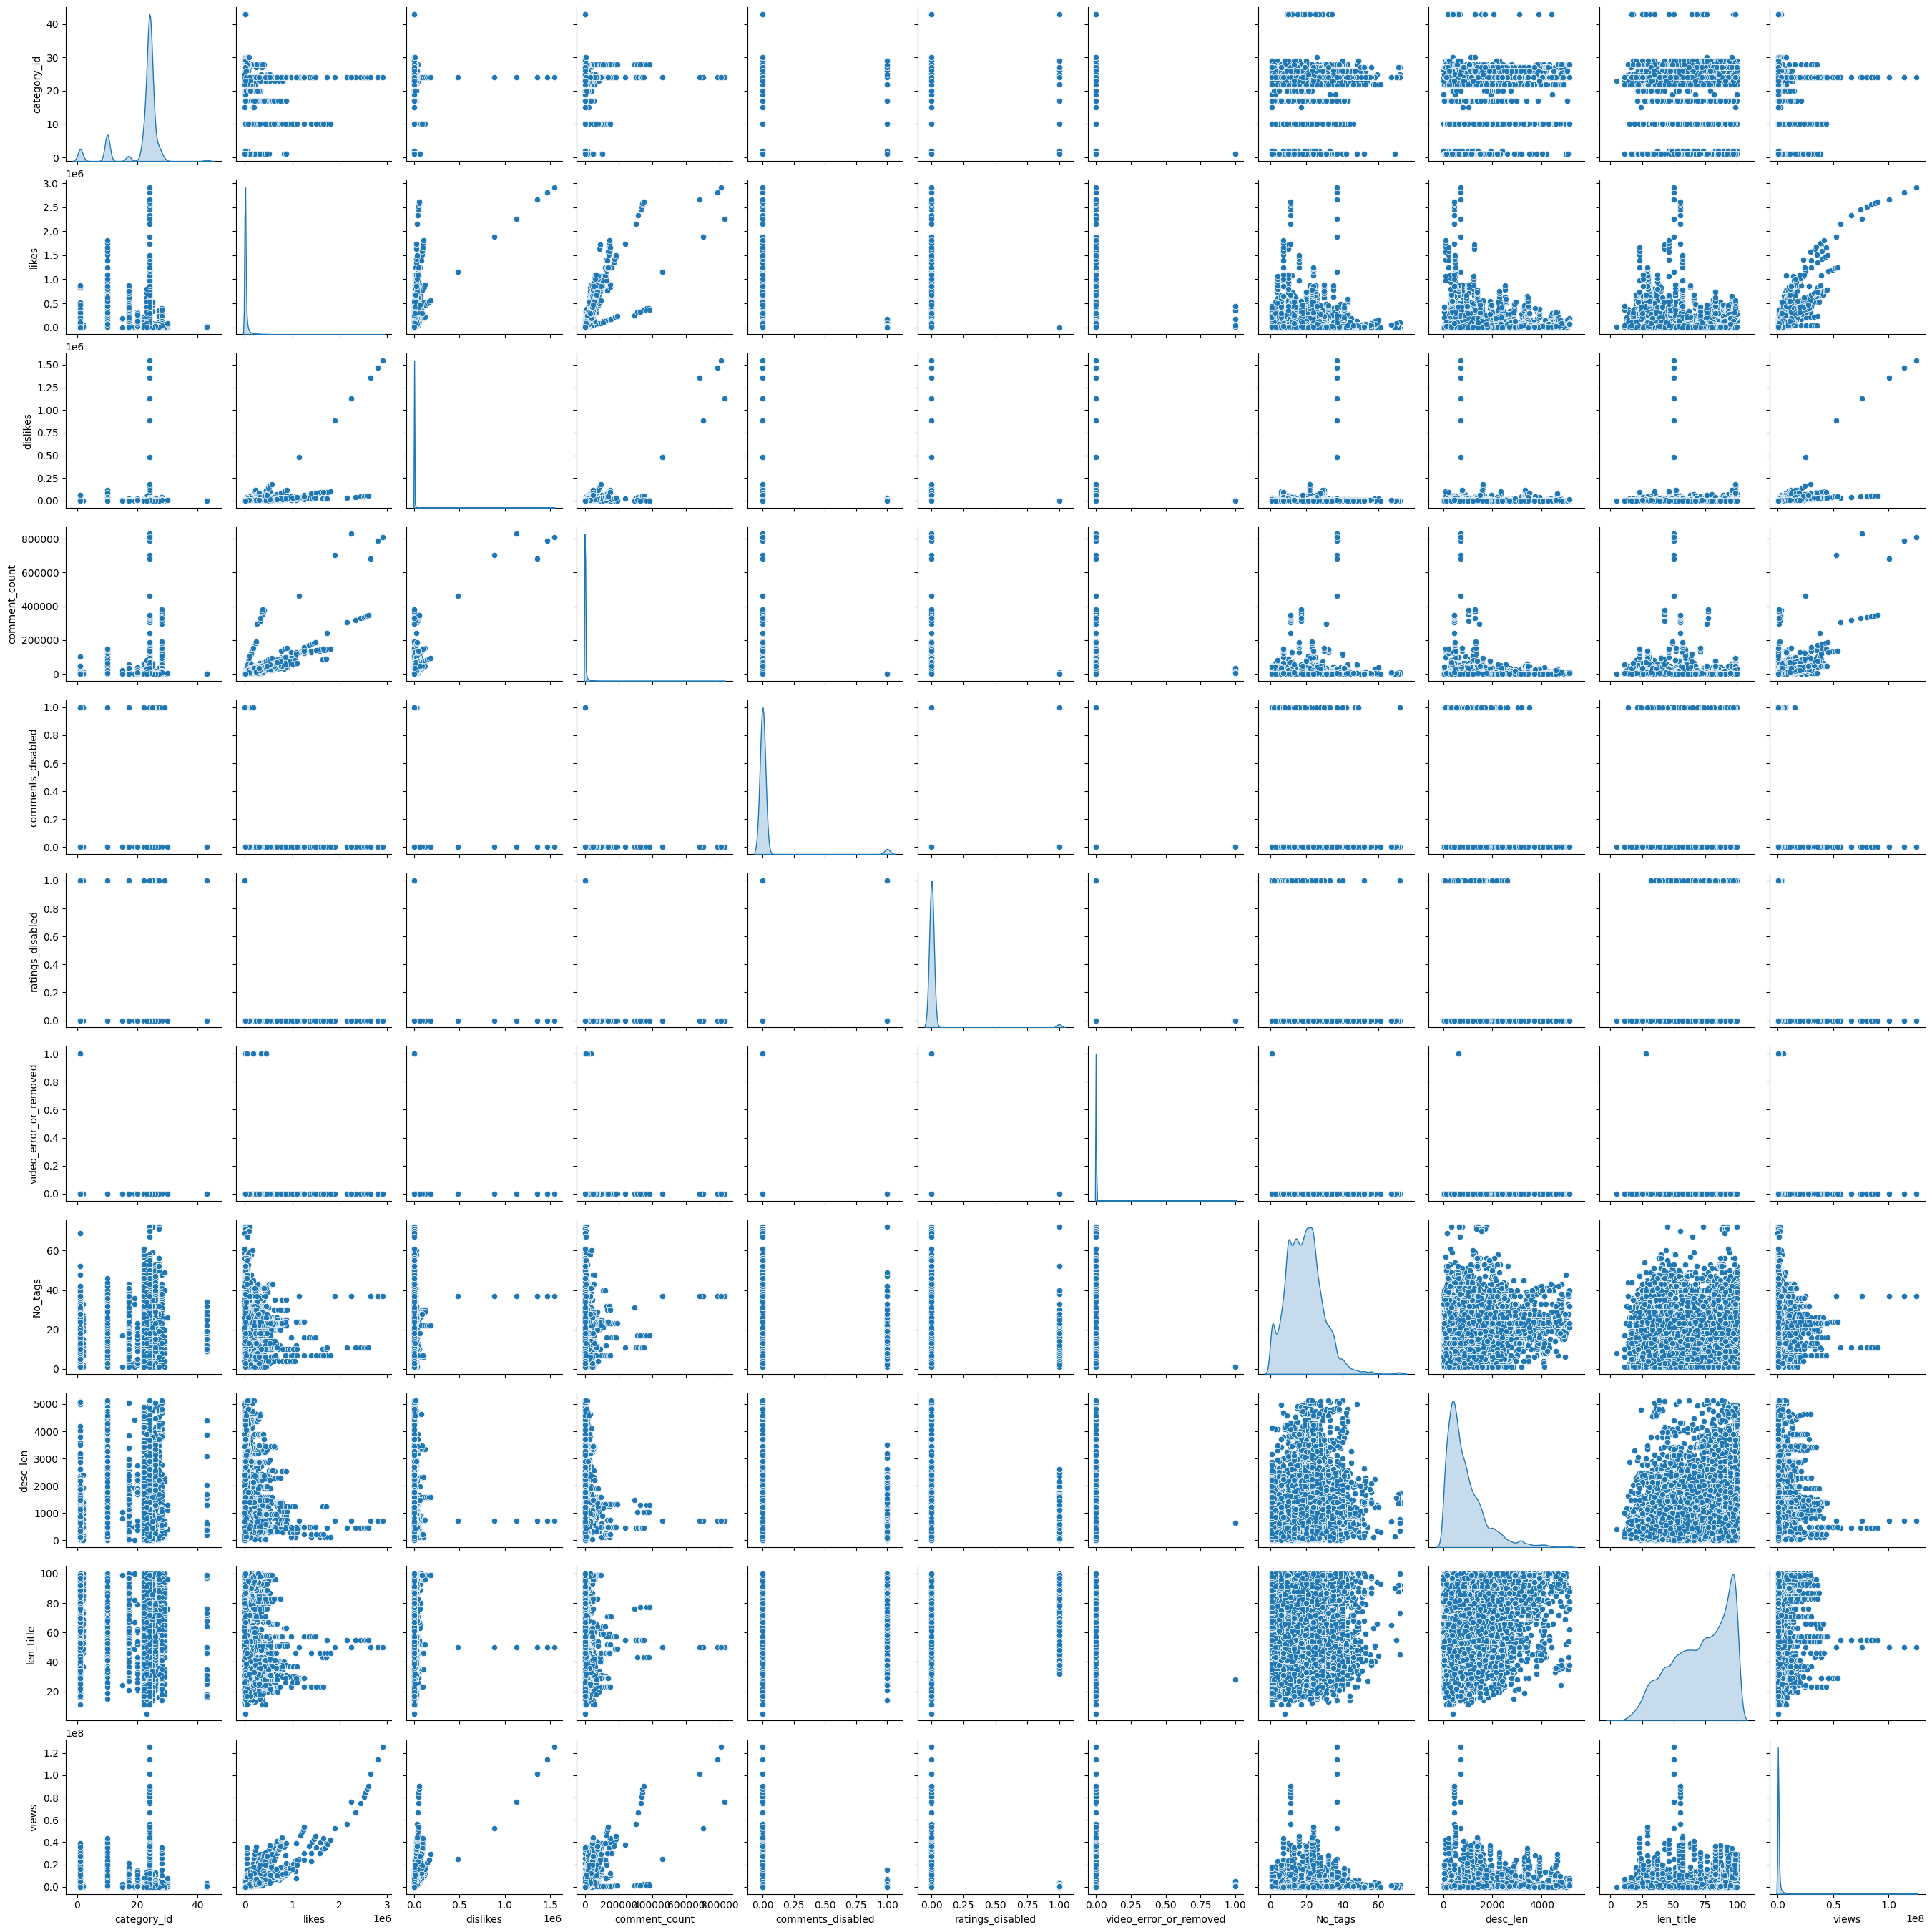

In [28]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

# Pre-Processing & Feature Engineering

### Feature Engineering for Date and Time

In [29]:
df[date].columns

Index(['trending_date', 'publish_date', 'publish_time'], dtype='object')

In [30]:
df[['trending_date', 'publish_date', 'publish_time']].head()

,trending_date,publish_date,publish_time
0,2017-11-14,2017-11-12,12:20:39
1,2017-11-14,2017-11-13,05:43:56
2,2017-11-14,2017-11-12,15:48:08
3,2017-11-14,2017-11-12,07:08:48
4,2017-11-14,2017-11-13,01:14:16


Mencari tahu kapan waktu publish video

In [31]:
# Split hour, minute, and second into separated columns
df[['publish_hour', 'publish_minute', 'publish_second']] = df['publish_time'].str.split(':', expand=True)

# Change data types into integer
df['publish_hour'] = df['publish_hour'].astype(int) #the most important one in publish time in a day is the hour not minutes or seconds

# Make time classifier into AM and PM
df['publish_hour_category'] = np.where((df['publish_hour'] >= 0) & (df['publish_hour'] <= 12), 'AM', 'PM')

# Quick label encoding for publish_hour_category
df['publish_hour_category'] = df['publish_hour_category'].astype('category').cat.codes

df.drop(columns=['publish_minute', 'publish_second'], inplace=True)
# df['minute_publish'] = df['minute_publish'].astype(int)
# df['second_publish'] = df['second_publish'].astype(int)

In [32]:
df['publish_hour']

0        12
1         5
2        15
3         7
4         1
         ..
36739    13
36740     3
36741     6
36758     8
36769    10
Name: publish_hour, Length: 32562, dtype: int64

In [33]:
df['publish_hour_category']

0        0
1        0
2        1
3        0
4        0
        ..
36739    1
36740    0
36741    0
36758    0
36769    0
Name: publish_hour_category, Length: 32562, dtype: int8

In [34]:
# Convert trending date form object to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Splitting trending date into year, month, and day
df['trending_year'] = df['trending_date'].dt.year
df['trending_month'] = df['trending_date'].dt.month
df['trending_day'] = df['trending_date'].dt.day
df['trending_day_of_week'] = df['trending_date'].dt.day_of_week
df['trending_day_of_year'] = df['trending_date'].dt.day_of_year
df['is_weekend_trending_day_of_week'] = df['trending_date'].dt.day_of_week.isin([5, 6])
df[['trending_date', 'trending_year', 'trending_month', 'trending_day', 'trending_day_of_week', 'trending_day_of_year', 'is_weekend_trending_day_of_week']].head()

,trending_date,trending_year,trending_month,trending_day,trending_day_of_week,trending_day_of_year,is_weekend_trending_day_of_week
0,2017-11-14,2017,11,14,1,318,False
1,2017-11-14,2017,11,14,1,318,False
2,2017-11-14,2017,11,14,1,318,False
3,2017-11-14,2017,11,14,1,318,False
4,2017-11-14,2017,11,14,1,318,False


In [35]:
# Convert publish date form object to datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Splitting publish date into year, month, and day
df['publish_year'] = df['publish_date'].dt.year
df['publish_month'] = df['publish_date'].dt.month
df['publish_day'] = df['publish_date'].dt.day
df['publish_day_of_week'] = df['publish_date'].dt.day_of_week
df['publish_day_of_year'] = df['publish_date'].dt.day_of_year
df['is_weekend_publish_day_of_week'] = df['publish_date'].dt.day_of_week.isin([5,6])
df[['publish_date', 'publish_year', 'publish_month', 'publish_day', 'publish_day_of_week', 'publish_day_of_year', 'is_weekend_publish_day_of_week']].head()


,publish_date,publish_year,publish_month,publish_day,publish_day_of_week,publish_day_of_year,is_weekend_publish_day_of_week
0,2017-11-12,2017,11,12,6,316,True
1,2017-11-13,2017,11,13,0,317,False
2,2017-11-12,2017,11,12,6,316,True
3,2017-11-12,2017,11,12,6,316,True
4,2017-11-13,2017,11,13,0,317,False


In [36]:
## Quick label encoding for is_weekend for trending and publish

# Label encoding for is_weekend features
df.replace({'is_weekend_trending_day_of_week':{'False':0,'True':1},
            'is_weekend_publish_day_of_week':{'False':0,'True':1}},inplace=True)

df['is_weekend_trending_day_of_week'] = df['is_weekend_trending_day_of_week'].astype('int64')
df['is_weekend_publish_day_of_week'] = df['is_weekend_publish_day_of_week'].astype('int64')

In [37]:
# Calculate days difference between publish date to trending date
df['diff_days'] = (df['trending_date'] - df['publish_date']) / np.timedelta64(1, 'D')

In [38]:
# Re-arrange the columns (views in last)
df_1 = df.drop(columns='views')
df_2 = df['views']
df = pd.concat([df_1, df_2], axis='columns')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32562 entries, 0 to 36769
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   trending_date                    32562 non-null  datetime64[ns]
 1   title                            32562 non-null  object        
 2   channel_title                    32562 non-null  object        
 3   category_id                      32562 non-null  int64         
 4   publish_time                     32562 non-null  object        
 5   tags                             32562 non-null  object        
 6   likes                            32562 non-null  int64         
 7   dislikes                         32562 non-null  int64         
 8   comment_count                    32562 non-null  int64         
 9   comments_disabled                32562 non-null  bool          
 10  ratings_disabled                 32562 non-null  bool     

<Axes: >

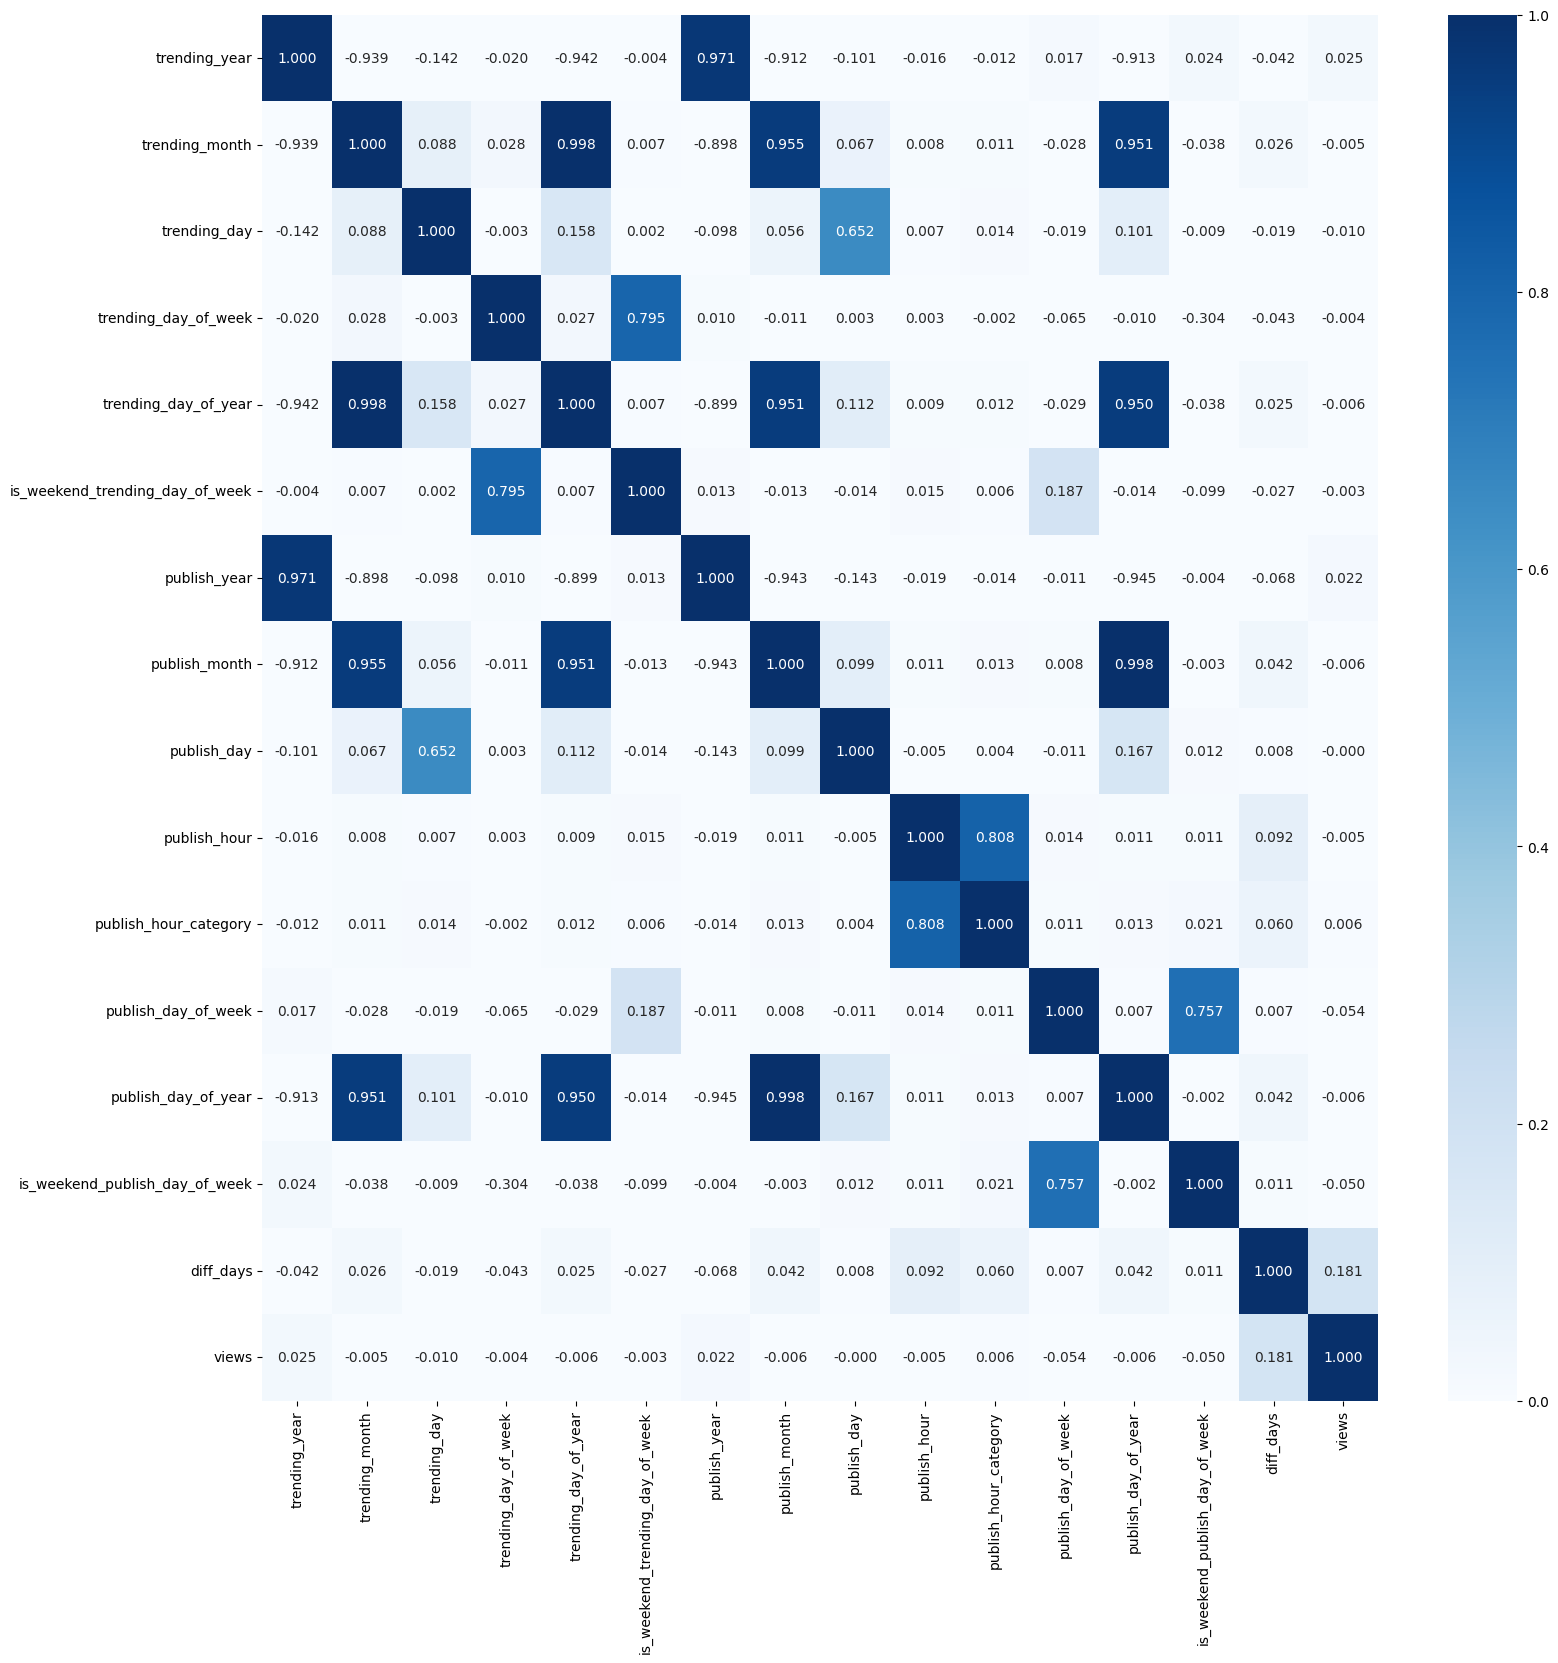

In [40]:
# Heatmap for every date features to target (views)
plt.figure(figsize=(18, 18))
sns.heatmap(df[['trending_year', 'trending_month', 'trending_day', 'trending_day_of_week', 'trending_day_of_year', 'is_weekend_trending_day_of_week', 'publish_year', 'publish_month', 'publish_day', 'publish_hour', 'publish_hour_category', 'publish_day_of_week', 'publish_day_of_year', 'is_weekend_publish_day_of_week', 'diff_days', 'views']].corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f', vmin=0, vmax=1)

Dari feature-feature baru akan di-include 'diff_days' karena nilai korelasinya dengan variable target paling tinggi; dan beberapa feature potensial seperti yang memiliki korelasi > |0.05| seperti publish_day_of_week (is_weekend_publish_day_of_week tidak digunakan karena merupakan turunan dari publish_day_of_week, mencegah multikolinearitas), nanti akan dicoba lebih lanjut dibawah

### Feature Engineering For Bool (Label Encoding)

In [41]:
df[bool].columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], dtype='object')

In [42]:
for col in bool :
    print(f'value counts for {col}')
    print(df[col].value_counts())
    print()

value counts for comments_disabled
False    31478
True      1084
Name: comments_disabled, dtype: int64

value counts for ratings_disabled
False    31873
True       689
Name: ratings_disabled, dtype: int64

value counts for video_error_or_removed
False    32553
True         9
Name: video_error_or_removed, dtype: int64



In [43]:
# Before Encoding
df[bool].head()

,comments_disabled,ratings_disabled,video_error_or_removed
0,False,False,False
1,True,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [44]:
# Another way of label encoding
for col in bool :
    df[col] = df[col].astype('category').cat.codes

In [45]:
# After Encoding
df[bool].head()

,comments_disabled,ratings_disabled,video_error_or_removed
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


### Handle Outlier

In [46]:
# Handle outlier with Z-Score
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'views']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 32562
Jumlah baris setelah memfilter outlier: 30921


### Final Check for Every Feature Before Selection

In [47]:
pd.options.display.max_columns = 100
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,publish_hour_category,trending_year,trending_month,trending_day,trending_day_of_week,trending_day_of_year,is_weekend_trending_day_of_week,publish_year,publish_month,publish_day,publish_day_of_week,publish_day_of_year,is_weekend_publish_day_of_week,diff_days,views
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",33966,798,882,0,0,0,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,0,2017,11,14,1,318,0,2017,11,12,6,316,1,2.0,1096327
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",735,904,0,1,0,0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,0,2017,11,14,1,318,0,2017,11,13,0,317,0,1.0,590101
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,2011,243,149,0,0,0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,1,2017,11,14,1,318,0,2017,11,12,6,316,1,2.0,473988
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",70353,1624,2684,0,0,0,This video showcases the difference between pe...,20,263,30,2017-11-12,7,0,2017,11,14,1,318,0,2017,11,12,6,316,1,2.0,1242680
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",492,293,66,0,0,0,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,0,2017,11,14,1,318,0,2017,11,13,0,317,0,1.0,464015


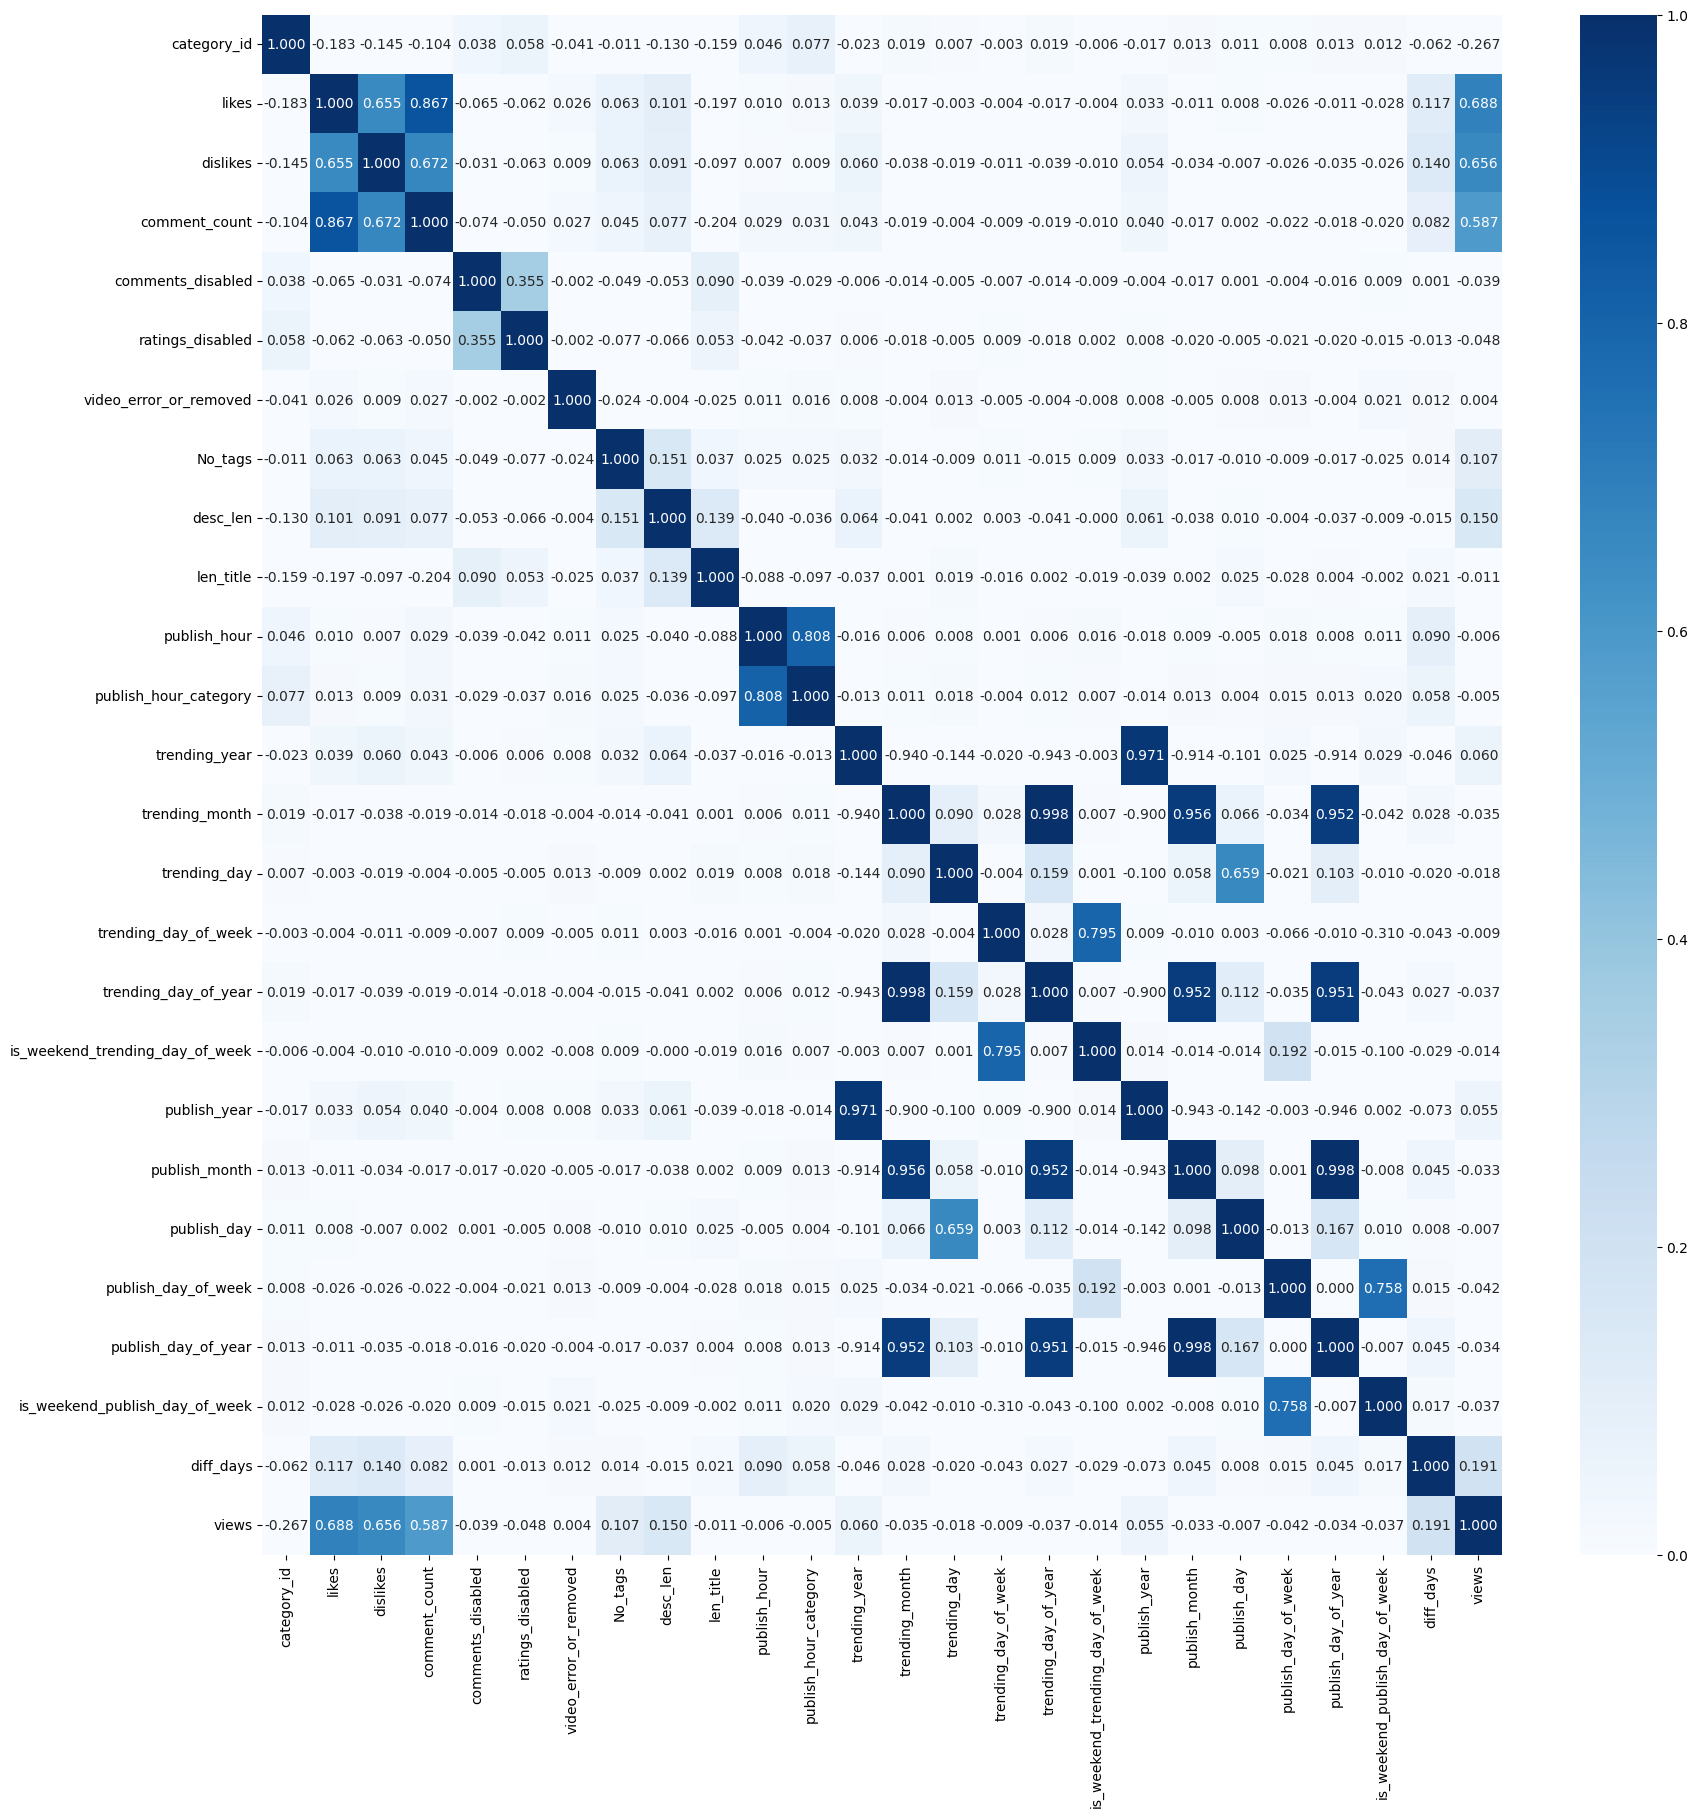

In [48]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data = df.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f', vmin=0, vmax=1)
plt.show()

* Features yang akan digunakan antara lain : ['category_id', 'likes', 'dislikes', 'ratings_disabled', 'No_tags', 'desc_len', 'diff_days'], melalui pertimbangan hubungan feature-target dan feature-feature (yang redundant dibuang dan diambil satu saja)
* Jika ingin diedit dan dicoba menggunakan yang lain boleh

## Feature Selection

In [49]:
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'No_tags', 'desc_len', 'len_title', 'publish_date',
       'publish_hour', 'publish_hour_category', 'trending_year',
       'trending_month', 'trending_day', 'trending_day_of_week',
       'trending_day_of_year', 'is_weekend_trending_day_of_week',
       'publish_year', 'publish_month', 'publish_day', 'publish_day_of_week',
       'publish_day_of_year', 'is_weekend_publish_day_of_week', 'diff_days',
       'views'],
      dtype='object')

In [50]:
df[cats].columns

Index(['title', 'channel_title', 'tags', 'description'], dtype='object')

In [51]:
# Select only relevant numeric features

df_model = df.copy()

selected_features = ['category_id', 'likes', 'dislikes', 'ratings_disabled', 'No_tags', 'desc_len', 'diff_days', 'views'] # kasus pilih feature yang relevan saja
# excluded_features = ['trending_date', 'publish_date', 'publish_time', 'description', 'tags', 'title', 'channel_title'] # kasus menggunakan semua feature numeric

df_model = df_model[selected_features]
# df_model = df_model.drop(columns=excluded_features)

# Regression

## Split Train and Test Data

In [52]:
x = df_model.drop(columns=['views'])
y = df_model[['views']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## Standardize

karena semua fitur adalah numerik dan dalam melakukan regresi perlu dilakukan normalisasi terhadap fitur

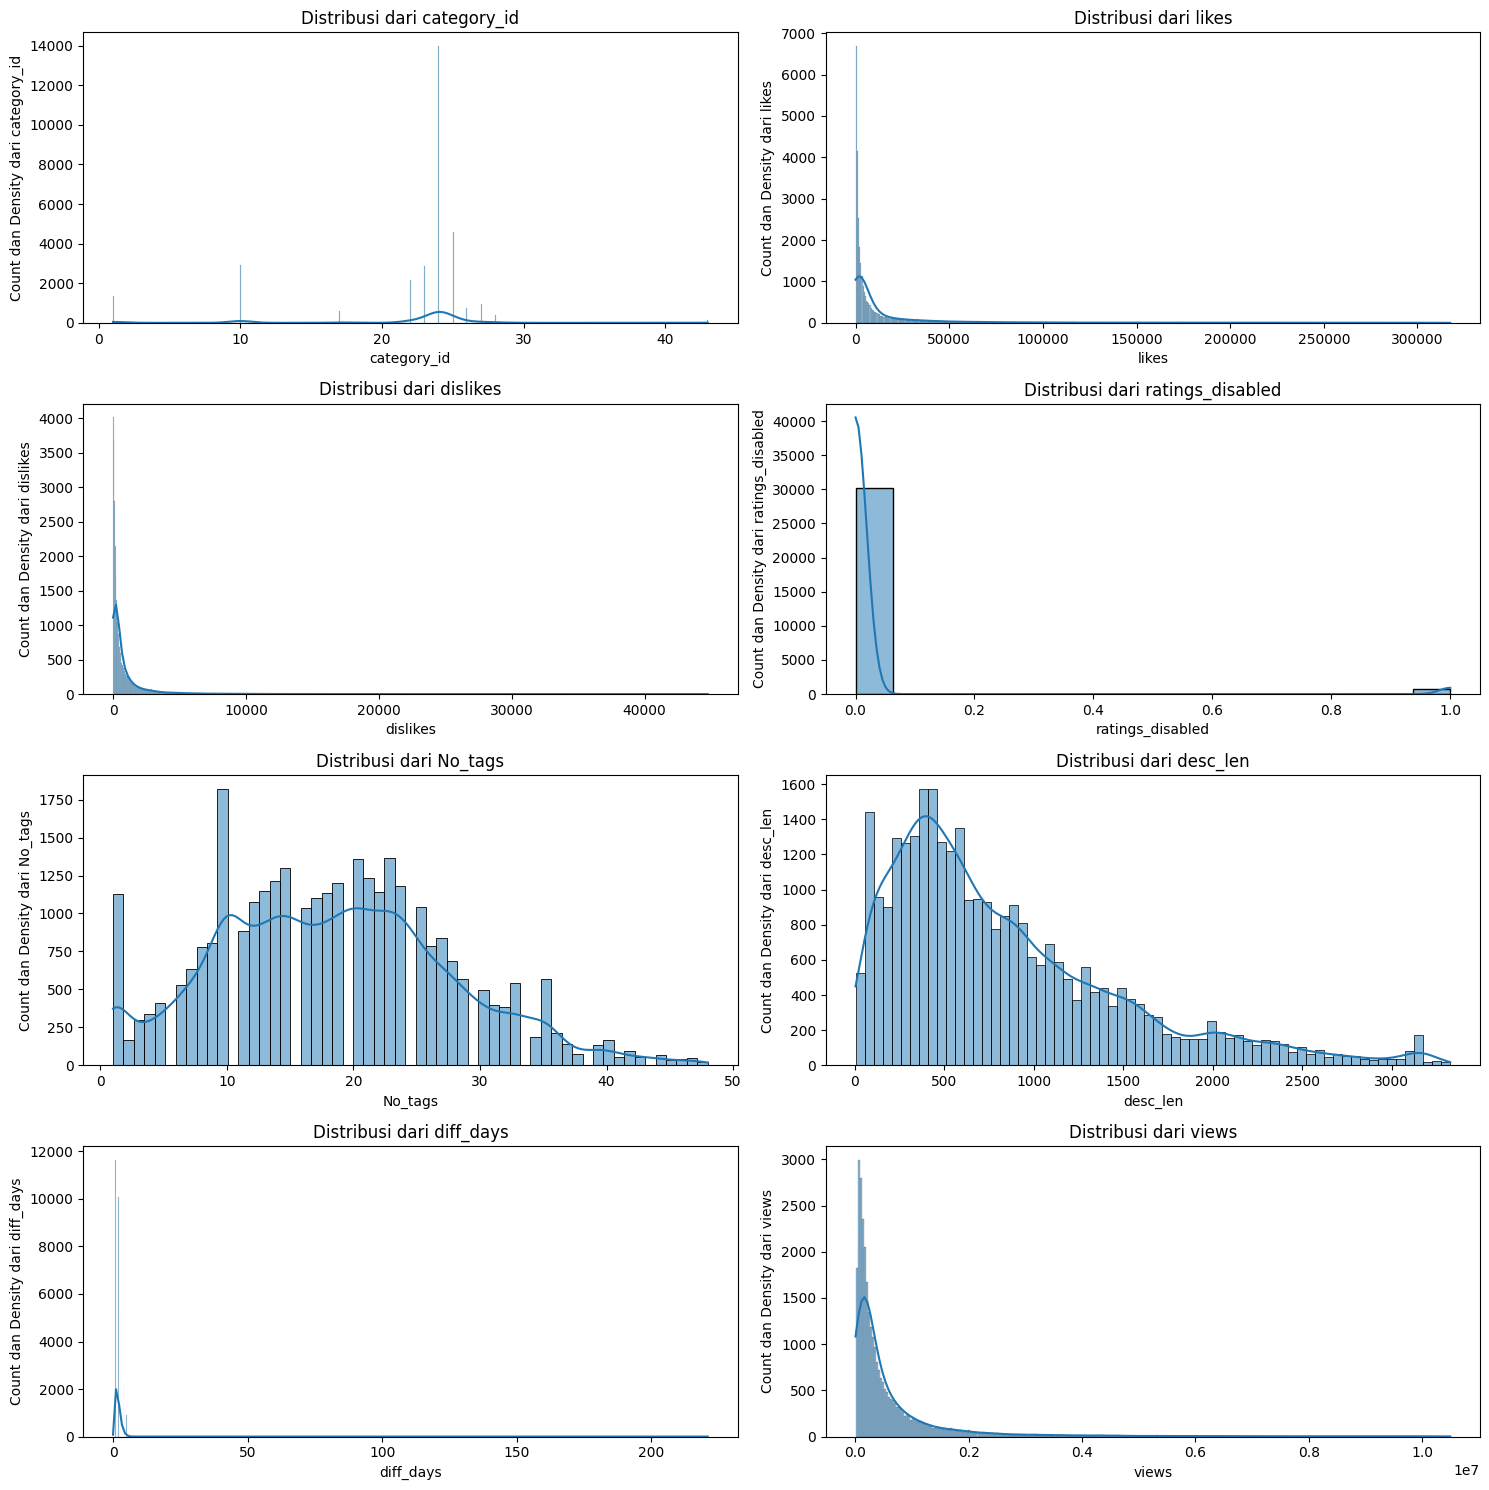

In [53]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(selected_features)) :
  sns.histplot(ax=axes[i], x=df_model[selected_features[i]], kde=True)
  axes[i].set_title(f'Distribusi dari {selected_features[i]}')
  axes[i].set_ylabel(f'Count dan Density dari {selected_features[i]}')
  axes[i].set_xlabel(f'{selected_features[i]}')

plt.tight_layout()

In [54]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

numerical_features = x.columns.to_list()
for n in numerical_features:
  scaler = ms.fit(x_train[[n]])
  x_train[n] = scaler.transform(x_train[[n]])
  x_test[n] = scaler.transform(x_test[[n]])
  # scaler.to_pickle(filename)

## Train Regression Models

In [55]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [59]:
# Boosting : AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor()
clf.fit(x_train, y_train)

AdaBoostRegressor()

In [60]:
# Boosting : XGBoost Regression
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # # karena lama di-comment saja jika mau lihat cepat hasilnya
  # # k-fold cross validation
  # score = cross_validate(model, x.select_dtypes(int), y, cv=5, scoring='r2', return_train_score=True)
  # print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  # print('r2 (cross-val train): ' + str(score['train_score'].mean()))

In [62]:
print('Evaluate LinearRegression')
eval_regression(regressor)
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

print('\nEvaluate SVR')
eval_regression(svr)

print('\nEvaluate AdaBoostRegressor')
eval_regression(clf)
print('\nEvaluate XGBRegressor')
eval_regression(xg)


Evaluate LinearRegression
RMSE (test): 813824.5499567753
RMSE (train): 769197.8465322678
MAPE (test): 1.4586561510859481
MAPE (train): 1.4648474703487138
r2 (test): 0.5966262434723877
r2 (train): 0.575796295765123

Evaluate DecisionTreeRegressor
RMSE (test): 692013.5102128243
RMSE (train): 1550.151657809136
MAPE (test): 0.6076850124824298
MAPE (train): 0.0006533859418537642
r2 (test): 0.708341113914581
r2 (train): 0.9999982771529828

Evaluate RandomForestRegressor
RMSE (test): 464272.7431333054
RMSE (train): 174824.49457972625
MAPE (test): 0.4890641918397352
MAPE (train): 0.18887055098136118
r2 (test): 0.8687218520084852
r2 (train): 0.9780869464590328

Evaluate SVR
RMSE (test): 1345932.8880976182
RMSE (train): 1245598.8869416458
MAPE (test): 1.620880484721201
MAPE (train): 1.5765653827136485
r2 (test): -0.10329811665889554
r2 (train): -0.11238406797627154

Evaluate AdaBoostRegressor
RMSE (test): 1078426.8886870649
RMSE (train): 1064394.4719447542
MAPE (test): 4.628377514235838
MAPE (tr

Beberapa temuan mengenai algoritma yang tidak terlalu bagus performanya (sebelum tuning hyperparameter):

* Untuk SVR butuh waktu agak lama dan menghasilkan R2 yang negatif, sehingga tidak akan dipakai
* Untuk Decision Tree memiliki gap nilai R2 antara test dan train yang sangat tinggi dengan error yang sangat kecil pada train mengindikasikan kasus overfit
* Untuk Linear Regression dan AdaBoostRegressor memiliki R2 score yang rendah (underfitting), sehingga perlu dicek lebih lanjut

### Linear Regression Coefficient (Feature Importance)

In [63]:
x.columns

Index(['category_id', 'likes', 'dislikes', 'ratings_disabled', 'No_tags',
       'desc_len', 'diff_days'],
      dtype='object')

In [64]:
regressor.coef_

array([[-996206.34664055, 4341262.12086909, 8722877.41227832,
         122234.30782296,  286930.50942743,  312270.31706533,
        9618319.41820136]])

hasilnya mirip seperti hipotesis awal pada correlation heatmap, walaupun dalam hal prediksi konteksnya sedikit berbeda karena disini menceritakan tentang seberapa besar pengaruhnya terhadap nilai prediksi yang didapatkan

## Regularization (For Linear Regression) with Hyperparameter Tuning

The R2 score from the training and test sets is not too far apart in linear regression, indicating that the model is not overfitting, but underfit instead because the R2 score is so low, so regularization might not be the solution. However, let's proceed with testing just to make sure

In [65]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
eval_regression(ridge)

RMSE (test): 815997.6765554228
RMSE (train): 769630.9338877102
MAPE (test): 1.5021319042680668
MAPE (train): 1.5034040644029125
r2 (test): 0.5944691382519571
r2 (train): 0.5753184759658798


In [66]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs.fit(x_train, y_train)
eval_regression(rs)

RMSE (test): 813853.3299228457
RMSE (train): 769197.9220181206
MAPE (test): 1.459192837026539
MAPE (train): 1.4653192937530477
r2 (test): 0.5965977132731006
r2 (train): 0.5757962125059715


In [67]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
eval_regression(lasso_model)

RMSE (test): 813833.8332010603
RMSE (train): 769197.8529048098
MAPE (test): 1.4588105734966879
MAPE (train): 1.4649843932765971
r2 (test): 0.596617040902921
r2 (train): 0.5757962887363566


In [68]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')
clf.fit(x_train, y_train)
eval_regression(clf)

RMSE (test): 813824.8283422291
RMSE (train): 769197.8465380032
MAPE (test): 1.4586607834109788
MAPE (train): 1.4648515776560576
r2 (test): 0.596625967507733
r2 (train): 0.575796295758797


In [69]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train, y_train)
eval_regression(elasticnet_model)

RMSE (test): 1257938.9478167754
RMSE (train): 1159020.0806749994
MAPE (test): 4.271326250818229
MAPE (train): 4.150195767144812
r2 (test): 0.036248218664072684
r2 (train): 0.03688031814419601


In [70]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio)

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')
clf.fit(x_train, y_train)
eval_regression(clf)

RMSE (test): 817796.5612400628
RMSE (train): 770700.2175286028
MAPE (test): 1.5450540956493706
MAPE (train): 1.5425474138464264
r2 (test): 0.592679164137437
r2 (train): 0.5741375970778


dapat dilihat bahwa memang benar hasilnya tidak terlalu jauh ketika diaplikasikan regularisasi

## Summary Dari Model-Model Yang Telah Dicoba

Dilakukan percobaan terhadap model dibawah ini :

1. Linear Regression (with regularization : Ridge, Lasso, and Elastic Net)
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Regression
5. Gradient Boosting Regression (AdaBoost and XGBoost)

Dari keseluruhan tersebut diperoleh hasil yang terbaik dimiliki oleh <b>random forest regression</b> dan , <b>xgboost regression</b> sehingga model tersebut yang akan dilakukan hyperparameter tuning untuk sedikit memperbaiki hasilnya (untuk model lainnya juga, jika ada waktu dan resource lainnya akan dilakukan eksperimen)

## Hyperparameter Tuning for First Best Model : Random Forest Regression

<b>Hyperparameter yang biasa di tuning pada Random Forest:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Dokumentasi Sklearn Random Forest</a>)
- n_estimators: jumlah subtree yang akan dibangun
- max_samples: Jumlah maksimal sampel pada masing-masing training subset (setelah proses bootstrap)

Sisa hyperparameter lainnya sama dengan Decision Tree, yaitu:
- criterion: cara menghitung impurity pada feature (gini, entropy), ini untuk classification untuk regression beda lagi. melihat feature mana yang menjadi root/node
- max_depth: maksimal kedalaman tree untuk mencegah overfitting
- min_sample_split: berapa jumlah sample yg dibutuhkan pada node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- min_sample_leaf: berapa jumlah sample yg dibutuhkan pada leaf agar leaf terbentuk (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- ccp_alpha: jika cost/error dari sebuah leaf/subtree lebih besar daripada ccp_alpha, subtree tersebut akan kita hapus/prune sehingga meminimalisir error/variance dari model

In [71]:
# Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(50, 180, 5)]
criterion = ['squared_error', 'poisson']
max_depth = [int(x) for x in np.linspace(50, 180, 5)]
min_samples_split = [int(x) for x in np.linspace(2, 10, 2)]
min_samples_leaf = [int(x) for x in np.linspace(2, 10, 2)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Inisiasi model
rf = RandomForestRegressor()
rs = RandomizedSearchCV(rf, hyperparameters, scoring='r2', cv=10, error_score='raise')
rs.fit(x_train, y_train)

# Evaluation
eval_regression(rs)

RMSE (test): 473721.5961101194
RMSE (train): 229837.72272480046
MAPE (test): 0.4833183428202305
MAPE (train): 0.23479972924468942
r2 (test): 0.863323945291395
r2 (train): 0.9621260189968321


## Hyperparameter Tuning for Second Best Model : XGBoost Regression

<b>Hyperparameter yang umum di tuning pada XGBoost:</b> (<a href='https://xgboost.readthedocs.io/en/latest/parameter.html'>Dokumentasi XGBoost</a>)
- <b>Terkait arsitektur tree</b>:
    - max_depth: maksimal kedalaman tree untuk mencegah overfitting
    - min_child_weight: minimum weight (atau jumlah sample; jika total weightnya=1) yang dimiliki oleh node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
    - gamma: minimum loss/error reduction yang diatur untuk membuat sebuah leaf baru
    - tree_method: bagaimana metode xgboost untuk membangun sebuah treenya. algoritma yang kita pelajari tree_method = exact. Referensi lain dapat dilihat <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>disini</a>.

- <b>Terkait subsampling pada proses boosting</b>. Daripada menggunakan keseluruhan data train setiap iterasinya, kita dapat menggunakan sample pada setiap iterasinya/
    - subsample: berapa banyak baris sample yang digunakan untuk sampling di setiap stepnya. 1 untuk semua baris.
    - colsample_bytree: berapa banyak faeture yang digunakan. 1 untuk semua feature

- <b>Terkait control learning rate</b>:
    - eta: step size untuk update weight feature pada xgboost, range value: 0-1. semakin kecil eta, semakin detail perbaikannya, namun butuh lebih banyak iterasi dari boosting.
        - di sklearn, nama hyperparameternya adalah learning_rate.
    
- <b>Regularization pada XGBoost</b>:
    - lambda: koefisien regularisasi pada L2 norm
    - alpha: koefisien regularisasi pada L1 norm

- <b>Terkait learning task XGBoost</b>:
    - objective: fungsi objective yang digunakan, seperti menghitung error pada regression
    - eval_metric: metrics evaluasi yang akan digunakan pada data validation (i.e. rmse, mae, auc)
    - seed: random state

- <b>Lainnya</b>:
    - scale_pos_weight: jika data imbalance, parameter ini digunakan untuk mengatur bobot dari masing-masing label.
    
- <b>Parameter lain yang untuk pengecekan dan debug model</b>:
    - verbose: untuk menampilkan detail log dari training model. 0: tidak menampilkan pesan apapun; 1: menampilkan jika ada warning saja; 2: menampilkan info (akan deprecated, contohnya); 3: debug: detail training dari model

In [72]:
# Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(5, 20, 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 3, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, 11)]
                    }

# Inisialisasi model
from xgboost import XGBRegressor
xg = XGBRegressor()
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=10, scoring='r2', error_score='raise')
xg_tuned.fit(x_train,y_train)

# Evaluation
eval_regression(xg_tuned)

RMSE (test): 430282.2429355464
RMSE (train): 165973.6620207595
MAPE (test): 0.5466695982077049
MAPE (train): 0.41007365407495416
r2 (test): 0.8872405591002124
r2 (train): 0.9802495638888478


(hati-hati bisa tidak selesai-selesai runningnya, ini saya coba puluhan menit baru selesai)

## Perbandingan Hasil Sebelum dan Sesudan Hyperparameter Tuning

Pada bagian ini hasilnya B. After Hyperparameter Tuning akan berubah-ubah setelah didapatkan yang terbaik (dan A juga bisa jadi berubah setelah menggunakan feature lain atau ada perlakukan lain)

<b>Evaluate RandomForestRegressor</b>

A. Before Hyperparameter Tuning
* RMSE (test): 457124.4076980449
* RMSE (train): 174587.89562120195
* MAPE (test): 0.4864437015064006
* MAPE (train): 0.18861722882352977
* r2 (test): 0.8727332694155859
* r2 (train): 0.9781462184433382

B. After Hyperparameter Tuning
* RMSE (test): 473721.5961101194
* RMSE (train): 229837.72272480046
* MAPE (test): 0.4833183428202305
* MAPE (train): 0.23479972924468942
* r2 (test): 0.863323945291395
* r2 (train): 0.9621260189968321

<b>Evaluate XGBRegressor</b>

A. Before Hyperparameter Tuning
* RMSE (test): 434033.17926008505
* RMSE (train): 268844.787202561
* MAPE (test): 0.5695837718990354
* MAPE (train): 0.5106639361043158
* r2 (test): 0.8852660550897516
* r2 (train): 0.9481795025922212

B. After Hyperparameter Tuning
* RMSE (test): 430282.2429355464
* RMSE (train): 165973.6620207595
* MAPE (test): 0.5466695982077049
* MAPE (train): 0.41007365407495416
* r2 (test): 0.8872405591002124
* r2 (train): 0.9802495638888478